# Week 6 - Modern Digital Technologies in Text Analysis

# Converting Text to Features

We are going to cover basic to advanced feature engineering (text to features) methods. By the end of this seminar, you will be comfortable with the following methods:

1. One Hot encoding
2. Count vectorizer
3. N-grams
4. Co-occurrence matrix
5. Hash vectorizer
6. Term Frequency-Inverse Document Frequency (TF-IDF)
7. Word embedding
8. Implementing fastText

We already talked about the text preprocessing, let's explore `feature engineering`, the foundation for Natural Language Processing. Machines or algorithms cannot understand the characters/words or sentences, they can only take numbers as input that also includes binaries. But the inherent nature of text data is unstructured and noisy, which makes it impossible to interact with machines.

The procedure of converting raw text data into machine understandable format (numbers) is called feature engineering of text data. Machine learning and deep learning algorithms’ performance and accuracy is fundamentally dependent on the type of feature engineering technique used.

In this seminar we will discuss different types of feature engineering methods along with some state-of-the-art techniques; their functionalities, advantages, disadvantages; and examples for each. All of these will make you realize the importance of feature engineering.


## 1. Converting Text to Features Using One Hot Encoding

The traditional method used for feature engineering is One Hot encoding. If anyone knows the basics of machine learning, One Hot encoding is something they should have come across for sure at some point of time or maybe most of the time. It is a process of converting categorical variables into features or columns and coding one or zero for the presence of that particular category. We are going to use the same logic here, and the number of features is going to be the number of total tokens present in the whole corpus.

### Problem
You want to convert text to feature using One Hot encoding.

### Solution
One Hot Encoding will basically convert characters or words into binary
numbers as shown below.

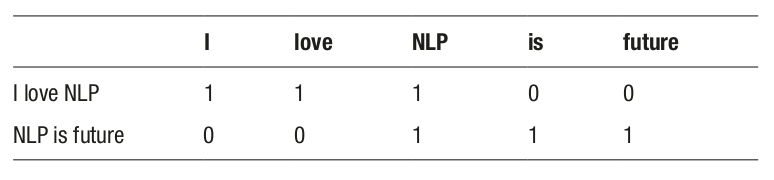

### How It Works

There are so many functions to generate One Hot encoding. We will take one function and discuss it in depth.

### Step 1-1 Store the text in a variable

This is for a single line:

In [ ]:
Text = "I am learning NLP"

### Step 1-2 Execute below function on the text data

Below is the function from the pandas library to convert text to feature.

In [ ]:
# Importing the library
import pandas as pd

# Generating the features
pd.get_dummies(Text.split())

Output has 4 features since the number of distinct words present in the input was 4.

Now let's check on the larger data:

In [ ]:
import PyPDF2
from PyPDF2 import PdfReader

In [ ]:
# creating a pdf file object
pdf = open("paper.pdf", "rb")

# create pdf reader object
pdf_reader = PdfReader(pdf)

print(f'Number of pages are: {len(pdf_reader.pages)}', '\n\n')

my_str = pdf_reader.pages[2].extract_text()

pdf.close()

In [ ]:
my_str

In [ ]:
# my_str = my_str.split()
# my_str

In [ ]:
pd.get_dummies(my_str.split())

In [ ]:
# creating a pdf file object
pdf = open("paper.pdf", "rb")

# create pdf reader object
pdf_reader = PdfReader(pdf)

print(f'Number of pages are: {len(pdf_reader.pages)}', '\n\n')

my_str = ''
for i in range(len(pdf_reader.pages)):
    my_str = my_str + pdf_reader.pages[i].extract_text() + '\n'

pdf.close()

In [ ]:
len(my_str.split())

In [ ]:
pd.get_dummies(my_str.split())

**Question**
* What is the disadvantage of the One Hot encoding??!!

## 2. Converting Text to Features Using Count Vectorizing

The approach in previous technique has a disadvantage It does not take the frequency of the word occurring into consideration. If a particular word is appearing multiple times, there is a chance of missing the information if it is not included in the analysis. A count vectorizer will solve that problem.

### Problem
How do we convert text to feature using a count vectorizer?

### Solution

Count vectorizer is almost similar to One Hot encoding. The only difference is instead of checking whether the particular word is present or not, it will count the words that are present in the document.

Observe the below example. The words “I” and “NLP” occur twice in the first document.

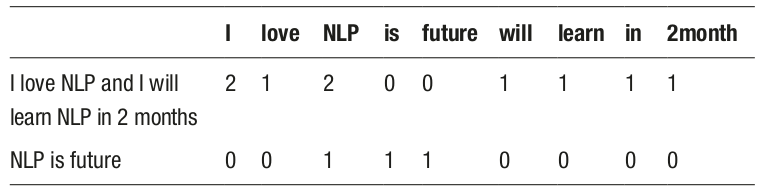

### How It Works

Sklearn has a feature extraction function that extracts features out of the text. Let’s discuss how to execute the same. Import the `CountVectorizer` function from Sklearn as explained below.

In [ ]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer

# Text
text = ["David loves NLP, and David will learn NLP in 2month"]

# create the transform
vectorizer = CountVectorizer()

# tokenizing
vectorizer.fit(text)

# encode document
vector = vectorizer.transform(text)

# summarize & generating output
print(vectorizer.vocabulary_)

print(vector.toarray())

**Question**

* What is the drawback of the first two methods??!!

## 3. Generating N-grams

If you observe the above methods, each word is considered as a feature. There is a drawback to this method.

It does not consider the previous and the next words, to see if that would give a proper and complete meaning to the words.

For example: consider the word `“not bad.”` If this is split into individual words, then it will lose out on conveying `“good”` – which is what this word actually means.

As we saw, we might lose potential information or insight because a lot of words make sense once they are put together. This problem can be solved by `N-grams`.

`N-grams` are the fusion of multiple letters or multiple words. They are formed in such a way that even the previous and next words are captured.

* Unigrams are the unique words present in the sentence.
* Bigram is the combination of 2 words.
* Trigram is 3 words and so on.

For example,
```
“I am learning NLP”
Unigrams: [“I”, “am”, “ learning”, “NLP”]
Bigrams: [“I am”, “am learning”, “learning NLP”]
Trigrams: [“I am learning”, “am learning NLP”]
```

### Problem

Generate the N-grams for the given sentence.

### Solution

There are a lot of packages that will generate the N-grams. The one that is mostly used is `TextBlob`.

### How It Works

Following the steps bellow.

### Step 3-1 Generating N-grams using TextBlob

Let us see how to generate N-grams using TextBlob.

In [ ]:
Text = "I am learning NLP"

Use the below TextBlob function to create N-grams. Use the text that is defined above and mention the `n` based on the requirement.

In [ ]:
#Import textblob
from textblob import TextBlob

#For unigram : Use n = 1
TextBlob(Text).ngrams(1)

In [ ]:
#For Bigram : For bigrams, use n = 2
TextBlob(Text).ngrams(2)

If we observe, we have 3 lists with 2 words at an instance.

In [ ]:
#For Trigram : For trigrams, use n = 3
TextBlob(Text).ngrams(3)

### Step 3-2 Bigram-based features for a document

We will use count vectorizer to generate features. Using the same function, let us generate bigram features and see what the output looks like.

In [ ]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer

# Text
text = ["David loves NLP and David will learn NLP in 2month "]

# create the transform
vectorizer = CountVectorizer(ngram_range=(2,2))

# tokenizing
vectorizer.fit(text)

# encode document
vector = vectorizer.transform(text)

# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

The output has features with bigrams, and for our example, the count is one for all the tokens.

## 4. Generating Co-occurrence Matrix

Let's discuss one more feture engineering method called a co-occurrence matrix.

### Problem

Understand and generate a co-occurence matrix.

### Solution

A co-occurrence matrix is like a count vectorizer where it counts the occurrence of the words together, instead of individual words.

### How It Works

Let’s see how to generate these kinds of matrixes using `nltk`, `bigrams`, and some basic Python coding skills.

### Step 4-1 Import the necessary libraries

In [ ]:
import numpy as np
import nltk
from nltk import bigrams
import itertools

### Step 4-2 Create function for co-occurrence matrix

The co_occurrence_matrix function is below.

In [ ]:
def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    
    vocab_to_index = {word:i for i, word in enumerate(vocab)}
    
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
#     print(bigram_freq)
    
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
    
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]    # first word
        previous = bigram[0][0]   # second word
        count = bigram[1]         # frequency of pairs of words
        pos_current = vocab_to_index[current]     # index of current word
        pos_previous = vocab_to_index[previous]   # index of previous word
        co_occurrence_matrix[pos_current][pos_previous] = count   # write number of accurence in matrix
        
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)   # make the matrix
    
    # return the matrix and the index
    return co_occurrence_matrix, vocab_to_index

### Step 4-3 Generate co-occurrence matrix

Here are the sentences for testing:

`itertools.chain.from_iterable()` function [Documentation](https://www.geeksforgeeks.org/python-itertools-chain-from_iterable/)

In [ ]:
sentences = [['I', 'love', 'nlp'],
             ['I', 'love','to', 'learn'],
             ['nlp', 'is', 'future'],
             ['nlp', 'is', 'cool']]

# create one list using many lists
merged = list(itertools.chain.from_iterable(sentences))
# print(merged)

matrix, vocab_to_index  = co_occurrence_matrix(merged)

# generate the matrix
CoMatrixFinal = pd.DataFrame(matrix, index = list(vocab_to_index.keys()), columns = list(vocab_to_index.keys()))

print(CoMatrixFinal)

If you observe, **“I,” “love,”** and **“is,” nlp”** has appeared together twice, and a few other words appeared only once.

## 5. Hash Vectorizing

A count vectorizer and co-occurrence matrix have one limitation though. In these methods, the vocabulary can become very large and cause memory/computation issues.

- One of the ways to solve this problem is a `Hash Vectorizer`.

### Problem

Understand and generate a Hash Vectorizer.

### Solution

Hash Vectorizer is memory efficient and instead of storing the tokens as strings, the vectorizer applies the [hashing trick](https://en.wikipedia.org/wiki/Feature_hashing) to encode them as numerical indexes.

**Note**: The downside is that it’s one way and once vectorized, the features cannot be retrieved.

### How It Works

Let’s take an example and see how to do it using **sklearn**.

### Step 5-1 Import the necessary libraries and create document

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

In [ ]:
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

### Step 5-2 Generate hash vectorizer matrix

Let’s create the HashingVectorizer of a vector size of 10.

In [ ]:
# transform
vectorizer = HashingVectorizer(n_features=10)

# create the hashing vector
vector = vectorizer.transform(text)

# summarize the vector

print(vector.shape)

print(vector.toarray())

It created vector of size 10 and now this can be used for any `supervised/unsupervised` tasks.

## 6. Converting Text to Features Using TF-IDF

Again, in the above-mentioned text-to-feature methods, there are few drawbacks, hence the introduction of TF-IDF. Below are the disadvantages of the above methods.

- Let’s say a particular word is appearing in all the documents of the corpus, then it will achieve higher importance in our previous methods. That’s bad for our analysis.

- The whole idea of having TF-IDF is to reflect on how important a word is to a document in a collection, and hence normalizing words appeared frequently in all the documents.

### Problem

Text to feature using TF-IDF.

### Solution

**Term frequency (TF)**: Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

`TF` is basically capturing the importance of the word irrespective of the length of the document. For example, a word with the frequency of 3 with the length of sentence being 10 is not the same as when the word length of sentence is 100 words. It should get more importance in the first scenario; that is what `TF` does.

**Inverse Document Frequency (IDF)**: `IDF` of each word is the `log` of the ratio of the total number of rows to the number of rows in a particular document in which that word is present.

`IDF = log(N/n)`, where `N` is the total number of rows and `n` is the number of rows in which the word was present.

`IDF` will measure the rareness of a term. Words like `“a,”` and `“the”` show up in all the documents of the corpus, but rare words will not be there in all the documents. So, if a word is appearing in almost all documents, then that word is of no use to us since it is not helping to classify or in information retrieval. IDF will nullify this problem.

`TF-IDF` is the simple product of `TF` and `IDF` so that both of the drawbacks are addressed, which makes predictions and information retrieval relevant.

### How It Works

Let's look at the following steps.

### Step 6-1 Read the text data

In [ ]:
Text = ["The quick brown fox jumped over the lazy dog.", "The dog.", "The fox"]

### Step 6-2 Creating the Features

Execute the below code on the text data:

In [ ]:
#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Create the transform
vectorizer = TfidfVectorizer()

#Tokenize and build vocab
vectorizer.fit(Text)

#Summarize
print(vectorizer.vocabulary_)

print(vectorizer.idf_)

If you observe, `“the”` is appearing in all the 3 documents and it does not add much value, and hence the vector value is 1, which is less than all the other vector representations of the tokens.

All these methods or techniques we have looked into so far are based on frequency and hence called frequency-based embeddings or features. And in the next method, let us look at prediction-based embeddings, typically called word embeddings.

## 7. Implementing Word Embeddings

This method requires you to have a basic knowledge about how a neural network works and the mechanisms by which weights in the neural network are updated. If you don't have any knowledge about the Neural Network (NN) still it's fine. We will talk about it in the following seminars.

The fact is even though all previous methods solve most of the problems, once we get into more complicated problems where we want to capture the `semantic relation` between the words, these methods fail to perform.

Below are the challenges:

- All these techniques fail to capture the context and meaning of the words. All the methods discussed so far basically depend on the appearance or frequency of the words. But we need to look at how to capture the context or semantic relations: that is, how frequently the words are appearing close by.

1. I am eating an apple.
2. I am using apple.

If you observe the above example, Apple gives different meanings when it is used with different (close by) adjacent words, eating and using.

- For a problem like a document classification (book classification in the library), a document is really huge and there are a humongous number of tokens generated. In these scenarios, your number of features can get out of control (wherein) thus hampering the accuracy and performance.

A machine/algorithm can match two documents/texts and say whether they are same or not. But how do you make a machine understand that `“Apple”` in `“Apple is a tasty fruit”` is a fruit that can be eaten and not a company?

The answer to the above questions lies in creating a representation for words that capture their meanings, semantic relationships, and the different types of contexts they are used in.

The above challenges are addressed by **Word Embeddings**.

`Word embedding` is the feature learning technique where words from the vocabulary are mapped to vectors of real numbers capturing the contextual hierarchy.

If you observe the below table, every word is represented with 4 numbers called vectors. Using the word embeddings technique, we are going to derive those vectors for each and every word so that we can use it in future analysis. In the below example, the dimension is 4. But we usually use a dimension greater than 100.

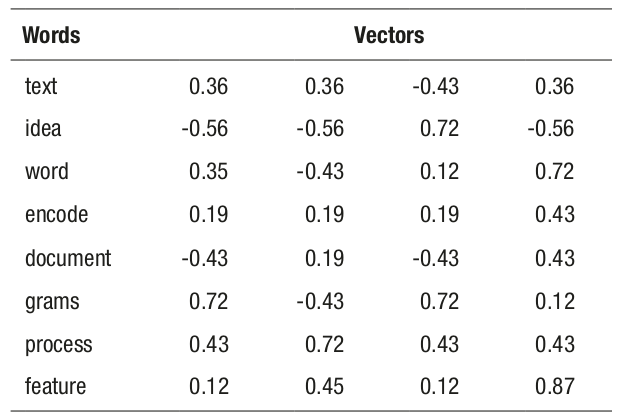

### Problem

You want to implement word embeddings.

### Solution

Word embeddings are prediction based, and they use shallow neural networks to train the model that will lead to learning the weight and using them as a vector representation.

**word2vec**: word2vec is the deep learning Google framework to train word embeddings. It will use all the words of the whole corpus and predict the nearby words. It will create a vector for all the words present in the corpus in a way so that the context is captured. It also outperforms any other methodologies in the space of word similarity and word analogies.

There are mainly 2 types in word2vec.

1. Skip-Gram
2. Continuous Bag of Words (CBOW)

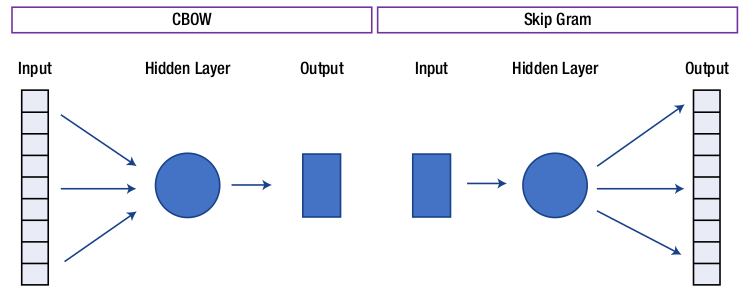

### How It Works

The above figure shows the architecture of the `CBOW` and `skip-gram` algorithms used to build word embeddings. Let us see how these models work in detail.

### Skip-Gram

The skip-gram model [Mikolov et al., 2013](https://arxiv.org/abs/1310.4546) is used to predict the probabilities of a word given the context of word or words.

Let us take a small sentence and understand how it actually works. Each sentence will generate a target word and context, which are the words nearby. The number of words to be considered around the target variable is called the window size. The table below shows all the possible target and context variables for window size 2. Window size needs to be selected based on data and the resources at your disposal. The larger the window size, the higher the computing power.

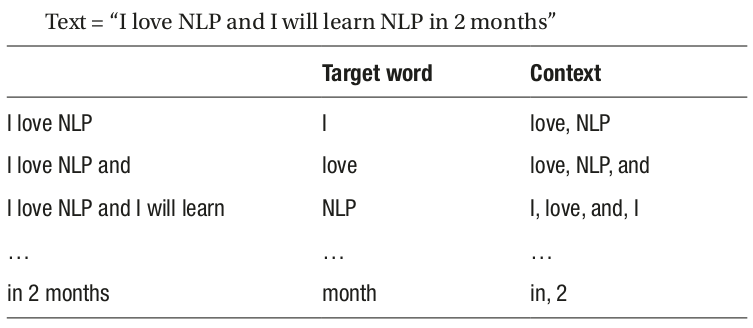

Since it takes a lot of text and computing power, let us go ahead and take sample data and build a `skip-gram` model.

As discussed earlier, 
* Import the text corpus
* Break it into sentences
* Perform some cleaning and preprocessing like the removal of punctuation and digits
* Split the sentences into words or tokens, etc.

In [ ]:
#Example sentences

sentences = [['I', 'love', 'nlp'],
             ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
             ['nlp', 'is', 'future'],
             ['nlp', 'saves', 'time', 'and', 'solves', 'lots', 'of', 'industry', 'problems'],
             ['nlp', 'uses', 'machine', 'learning']]

In [ ]:
# Install gensim library

# !pip install gensim

In [ ]:
#import library

import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

For more information about `word2vec`, check the [documentation.](https://radimrehurek.com/gensim/models/word2vec.html)

In [ ]:
# training the model

# vector_size --> Dimensionality of the word vectors
# window --> Maximum distance between the current and predicted word within a sentence
# min_count --> Ignores all words with total frequency lower than this
# sg --> Training algorithm, 1 for skip-gram otherwise CBOW

skipgram = Word2Vec(sentences, vector_size = 50, window = 3, min_count = 1, sg = 1)

print(f"{skipgram}\n")

# access vector for one word
print(skipgram.wv['nlp'])

Since our vector size parameter was 50, the model gives a vector of size 50 for each word.

In [ ]:
# access vector for another one word

print(skipgram.wv['deep'])

We get an error saying the word doesn’t exist because this word was not there in our input training data. This is the reason we need to train the algorithm on as much data possible so that we do not miss out on words.

There is one more way to tackle this problem. Refer to TF-IDF method.

In [ ]:
# save model
skipgram.save('skipgram.bin')

# load model
skipgram = Word2Vec.load('skipgram.bin')

T–SNE plot is one of the ways to evaluate word embeddings. Let’s generate it and see how it looks.

In [ ]:
# T–SNE plot
X = skipgram.wv[skipgram.wv.index_to_key]

pca = PCA(n_components=2)

result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])

words = list(skipgram.wv.index_to_key)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
plt.show()

### Continuous Bag of Words (CBOW)

Now let’s see how to build CBOW model.

In [ ]:
# import library
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
#Example sentences
sentences = [['I', 'love', 'nlp'],
             ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
             ['nlp', 'is', 'future'],
             ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
             ['nlp', 'uses', 'machine', 'learning']]

# training the model
cbow = Word2Vec(sentences, vector_size = 50, window = 3, min_count = 1, sg = 0)
print(f"{cbow}\n")

# access vector for one word
print(cbow.wv['nlp'])

# save model
cbow.save('cbow.bin')

# load model
cbow = Word2Vec.load('cbow.bin')

In [ ]:
# T – SNE plot
X = cbow.wv[cbow.wv.index_to_key]

pca = PCA(n_components=2)

result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])

words = list(cbow.wv.index_to_key)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
plt.show()

But to train these models, it requires a huge amount of computing power. So, let us go ahead and use Google’s pre-trained model, which has been trained with over 100 billion words.

Download the model from the below path and keep it in your local storage:

https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

Import the gensim package and follow the steps to understand Google’s word2vec.

In [ ]:
# import gensim package
import gensim

# load the saved model
model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

In [ ]:
# Checking how similarity works.
print(model.similarity('this', 'is'))

In [ ]:
# Lets check one more.
print (model.similarity('post', 'book'))

“This” and “is” have a good amount of similarity, but the similarity between the words “post” and “book” is poor. For any given set of words, it uses the vectors of both the words and calculates the similarity between them.

In [ ]:
# Finding the odd one out.
model.doesnt_match('breakfast cereal dinner lunch'.split())

Of 'breakfast’, ‘cereal’, ‘dinner’ and ‘lunch', only cereal is the word that is not anywhere related to the remaining 3 words.

In [ ]:
# It is also finding the relations between words.

model.most_similar(positive=['woman', 'king'], negative=['man'])

If you add ‘woman’ and ‘king’ and minus man, it is predicting queen as output with 71% confidence. Isn’t this amazing?

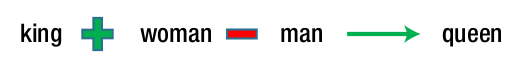

Let’s have a look at few of the interesting examples using T – SNE plot for word embeddings.

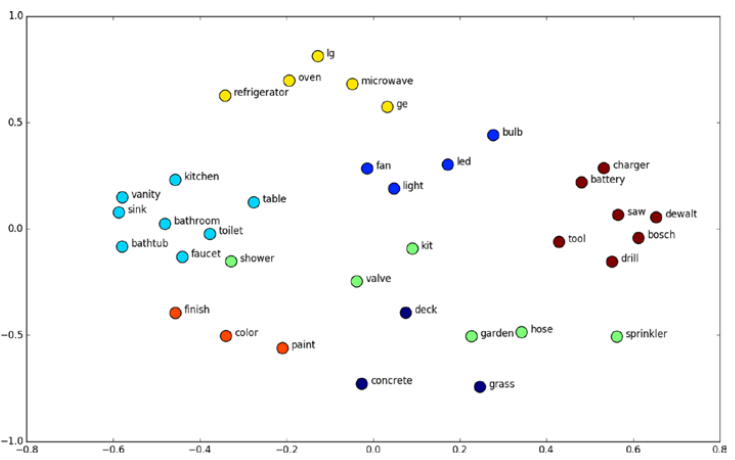

Above is the word embedding’s output representation of home interiors and exteriors. If you clearly observe, all the words related to electric fittings are near to each other; similarly, words related to bathroom fittings are near to each other, and so on. This is the beauty of word embeddings.

## 8. Implementing fastText

fastText is another deep learning framework developed by Facebook to capture context and meaning.

### Problem

How to implement fastText in Python.

### Solution

fastText is the improvised version of word2vec. word2vec basically considers words to build the representation. But fastText takes each character while computing the representation of the word.

### How It Works

Let us see how to build a fastText word embedding.

In [ ]:
# Import FastText
from gensim.models import FastText
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

For more information about `FastText`, check the [documentation.](https://radimrehurek.com/gensim/models/fasttext.html)

In [ ]:
# Example sentences
sentences = [['I', 'love', 'nlp'],
             ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
             ['nlp', 'is', 'future'],
             ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
             ['nlp', 'uses', 'machine', 'learning']]

# workers --> Use these many worker threads to train the model
#             (=faster training with multicore machines).

# min_n --> Minimum length of char n-grams to be used for training word representations.
# max_n --> Max length of char ngrams to be used for training word representations.
#.          Set max_n to be lesser than min_n to avoid char ngrams being used.
fast = FastText(sentences, vector_size=20, window=1, min_count=1,
                workers=5, min_n=1, max_n=2)

# vector for word nlp
print(fast.wv['nlp'])

In [ ]:
print(fast.wv['deep'])

This is the advantage of using fastText. The “deep” was not present in training of word2vec and we did not get a vector for that word. But since fastText is building on character level, even for the word that was not there in training, it will provide results. You can see the vector for the word “deep,” but it's not present in the input data.

In [ ]:
# save model
fast.save('fast.bin')

# load model
fast = Word2Vec.load('fast.bin')

# visualize - T–SNE plot
X = fast.wv[fast.wv.index_to_key]

pca = PCA(n_components=2)

result = pca.fit_transform(X)

In [ ]:
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])


words = list(fast.wv.index_to_key)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
plt.show()

The figure above shows the embedding representation for fastText. If you observe closely, the words “love” and “solve” are close together in fastText but in your skip-gram and CBOW, “love” and “learn” are near to each other. This is an effect of character-level embeddings.

We hope that by now you are familiar and comfortable with processing the natural language. Now that data is cleaned and features are created, let’s jump into building some applications around it that solves the business problem in  the next seminar.